In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("max_columns", None)

In [2]:
listings = pd.read_csv("../data/input/listings.csv")

In [4]:
listings.head(1)


id                            listing_url       scrape_id  \
0  12147973  https://www.airbnb.com/rooms/12147973  20160906204935   

  last_scraped                        name  \
0   2016-09-07  Sunny Bungalow in the City   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   

                                               space  \
0  The house has an open and cozy feel at the sam...   

                                         description experiences_offered  \
0  Cozy, sunny, family home.  Master bedroom high...                none   

                               neighborhood_overview notes  \
0  Roslindale is quiet, convenient and friendly. ...   NaN   

                                             transit  \
0  The bus stop is 2 blocks away, and frequent. B...   

                                              access interaction  \
0  You will have access to 2 bedrooms, a living r...         NaN   

                                         house_rules  \
0  Clean up and treat the home the way you'd like...   

                                       thumbnail_url  \
0  https://a2.muscache.com/im/pictures/c0842db1-e...   

                                          medium_url  \
0  https://a2.muscache.com/im/pictures/c0842db1-e...   

                                         picture_url  \
0  https://a2.muscache.com/im/pictures/c0842db1-e...   

                                      xl_picture_url   host_id  \
0  https://a2.muscache.com/im/pictures/c0842db1-e...  31303940   

                                     host_url host_name  host_since  \
0  https://www.airbnb.com/users/show/31303940  Virginia  2015-04-15   

                          host_location  \
0  Boston, Massachusetts, United States   

                                          host_about host_response_time  \
0  We are country and city connecting in our deck...                NaN   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                NaN                  NaN                 f   

                                  host_thumbnail_url  \
0  https://a2.muscache.com/im/pictures/5936fef0-b...   

                                    host_picture_url host_neighbourhood  \
0  https://a2.muscache.com/im/pictures/5936fef0-b...         Roslindale   

   host_listings_count  host_total_listings_count  \
0                    1                          1   

                          host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'facebook', 'reviews']                    t   

  host_identity_verified                                         street  \
0                      f  Birch Street, Boston, MA 02131, United States   

  neighbourhood neighbourhood_cleansed  neighbourhood_group_cleansed    city  \
0    Roslindale             Roslindale                           NaN  Boston   

  state zipcode  market smart_location country_code        country   latitude  \
0    MA   02131  Boston     Boston, MA           US  United States  42.282619   

   longitude is_location_exact property_type        room_type  accommodates  \
0 -71.133068                 t         House  Entire home/apt             4   

   bathrooms  bedrooms  beds  bed_type  \
0        1.5       2.0   3.0  Real Bed   

                                           amenities  square_feet    price  \
0  {TV,"Wireless Internet",Kitchen,"Free Parking ...          NaN  $250.00   

  weekly_price monthly_price security_deposit cleaning_fee  guests_included  \
0          NaN           NaN              NaN       $35.00                1   

  extra_people  minimum_nights  maximum_nights calendar_updated  \
0        $0.00               2            1125      2 weeks ago   

   has_availability  availability_30  availability_60  availability_90  \
0               NaN                0                0                0   

   availability_365 calendar_last_scraped  number_of_reviews first_review  \
0                 0   

In [6]:
len(listings)

3585

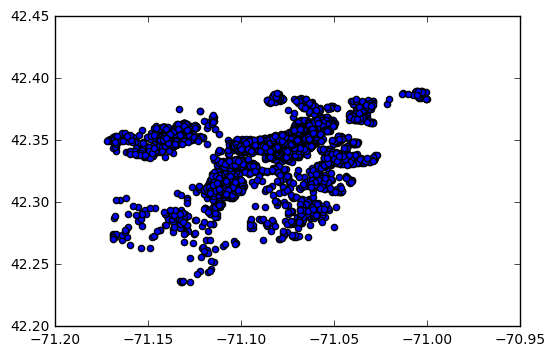

In [7]:
plt.scatter(listings['longitude'], listings['latitude'])


In [17]:
import mplleaflet

sample = listings.sample(1000)
plt.scatter(sample['longitude'], sample['latitude'])

mplleaflet.display()

# Geo Pandas

In [12]:
import geopandas as gpd


In [14]:
boston = gpd.read_file("../data/input/Census2010_Tracts.shp")


In [16]:
boston.head(1)

ALAND10  AWATER10 COUNTYFP10 FUNCSTAT10      GEOID10   INTPTLAT10  \
0  363702.0       0.0        025          S  25025010405  +42.3398654   

     INTPTLON10 MTFCC10  NAME10           NAMELSAD10 STATEFP10    Shape_Area  \
0  -071.0896052   G5020  104.05  Census Tract 104.05        25  3.914568e+06   

     Shape_Leng TRACTCE10                                           geometry  
0  14629.550361    010405  POLYGON ((766978.240309909 2951616.923866287, ...

In [18]:
boston['geometry'].head()


0    POLYGON ((766978.240309909 2951616.923866287, ...
1    POLYGON ((766835.3942200691 2949104.969886944,...
2    POLYGON ((769261.2628526837 2954196.132479325,...
3    POLYGON ((772221.7065478563 2953536.652079985,...
4    POLYGON ((762449.9770828187 2952359.446074486,...
Name: geometry, dtype: object

In [20]:
boston.crs


{'datum': 'NAD83',
 'lat_0': 41,
 'lat_1': 41.71666666666667,
 'lat_2': 42.68333333333333,
 'lon_0': -71.5,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'us-ft',
 'x_0': 199999.9999999999,
 'y_0': 750000}

In [21]:
boston.columns

Index(['ALAND10', 'AWATER10', 'COUNTYFP10', 'FUNCSTAT10', 'GEOID10',
       'INTPTLAT10', 'INTPTLON10', 'MTFCC10', 'NAME10', 'NAMELSAD10',
       'STATEFP10', 'Shape_Area', 'Shape_Leng', 'TRACTCE10', 'geometry'],
      dtype='object')

In [22]:
boston = boston.to_crs({'init': 'epsg:4326'})


In [24]:
boston['geometry'].head()

0    POLYGON ((-71.090087 42.3466569999999, -71.090...
1    POLYGON ((-71.09065999999994 42.33976599999991...
2    POLYGON ((-71.08159499999989 42.35370399999987...
3    POLYGON ((-71.070655 42.35185399999992, -71.07...
4    POLYGON ((-71.10682499999994 42.34875299999986...
Name: geometry, dtype: object

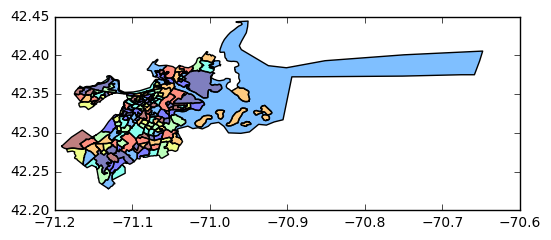

In [26]:
boston.plot()

In [27]:
import mplleaflet

f = plt.figure(figsize=(15, 8))
ax = f.gca()
boston.plot(ax=ax)
mplleaflet.display(fig=f)

## Convert Dataframe to Geodataframe

In [35]:
import shapely

In [36]:
listings = gpd.GeoDataFrame(listings, geometry=listings.apply(
        lambda srs: shapely.geometry.Point(srs['longitude'], srs['latitude']), axis='columns'
    ))

## Using Seaborn to Plot Geometries and Points

In [37]:
import seaborn as sns

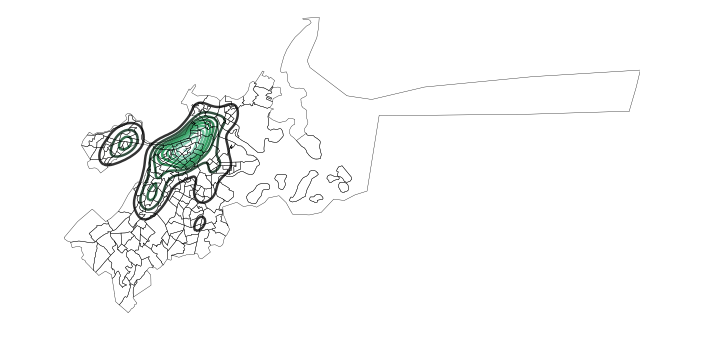

In [43]:
f = plt.figure(figsize=(7.5, 4))
ax = f.gca()
boston.plot(ax=ax, alpha=0.1, linewidth=0.25, color='white')
sns.kdeplot(data=listings.apply(lambda srs: pd.Series({'x': srs.geometry.x, 'y': srs.geometry.y}), axis='columns'), ax=ax,
            alpha=1)
ax.set_axis_off()

In [50]:
import numpy as np

def assign_census_tract(bnb):
    bools = [geom.contains(bnb['geometry']) for geom in boston['geometry']]
    if True in bools:
        return boston.iloc[bools.index(True)]['NAMELSAD10']
    else:
        return np.nan

In [51]:
listings['census_tract'] = listings.apply(assign_census_tract, axis='columns')

In [47]:
listings['census_tract'].value_counts().head()

Census Tract 701.01    113
Census Tract 102.03    111
Census Tract 8.02       95
Census Tract 201.01     86
Census Tract 606        84
Name: census_tract, dtype: int64

In [52]:
boston['BNBs'] = boston['NAMELSAD10'].map(listings['census_tract'].value_counts())


/usr/local/var/pyenv/versions/3.5.2/envs/python-geospatial-analysis/lib/python3.5/site-packages/pysal/esda/mapclassify.py:259: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/usr/local/var/pyenv/versions/3.5.2/envs/python-geospatial-analysis/lib/python3.5/site-packages/pysal/esda/mapclassify.py:259: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/usr/local/var/pyenv/versions/3.5.2/envs/python-geospatial-analysis/lib/python3.5/site-packages/numpy/lib/function_base.py:3569: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


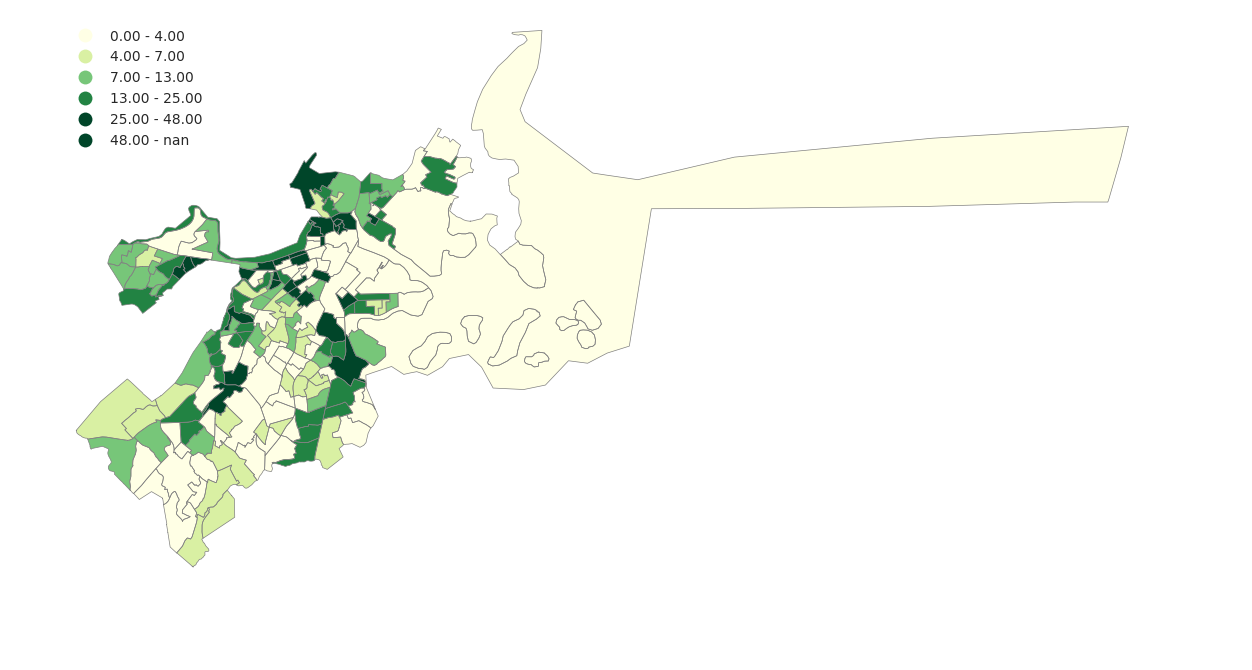

In [54]:
f = plt.figure(figsize=(15, 8))
ax = f.gca()
kw = dict(column='BNBs', k=6, cmap='YlGn', alpha=1, legend=True, edgecolor='gray', linewidth=0.5)
boston.plot(scheme='QUANTILES', ax=ax, **kw)
ax.set_axis_off()

In [68]:
boston['BNBDensity'] = (boston['BNBs'] / boston['geometry'].to_crs({'init': 'epsg:3395'}).map(lambda p: p.area / 10**6)).fillna(0)

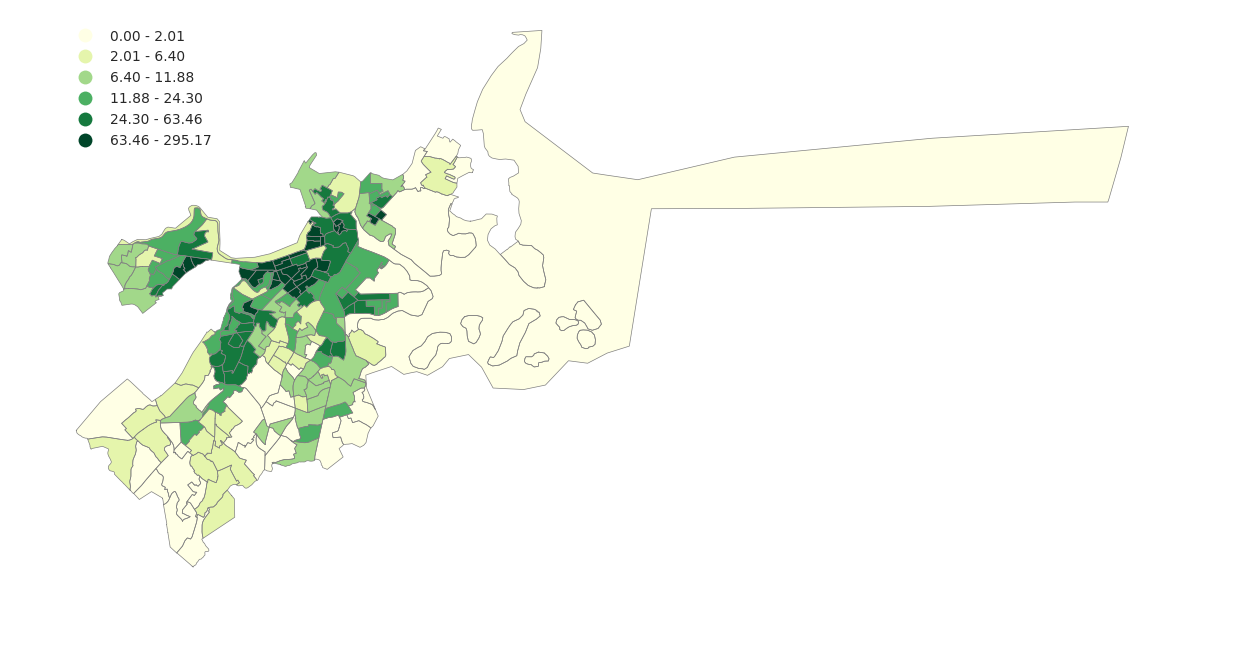

In [58]:
f = plt.figure(figsize=(15, 8))
ax = f.gca()
kw = dict(column='BNBDensity', k=6, cmap='YlGn', alpha=1, legend=True, edgecolor='gray', linewidth=0.5)
boston.plot(scheme='QUANTILES', ax=ax, **kw)
ax.set_axis_off()

### PySal

In [61]:
import pysal as ps

In [62]:
qW = ps.queen_from_shapefile("../data/input/Census2010_Tracts.shp")


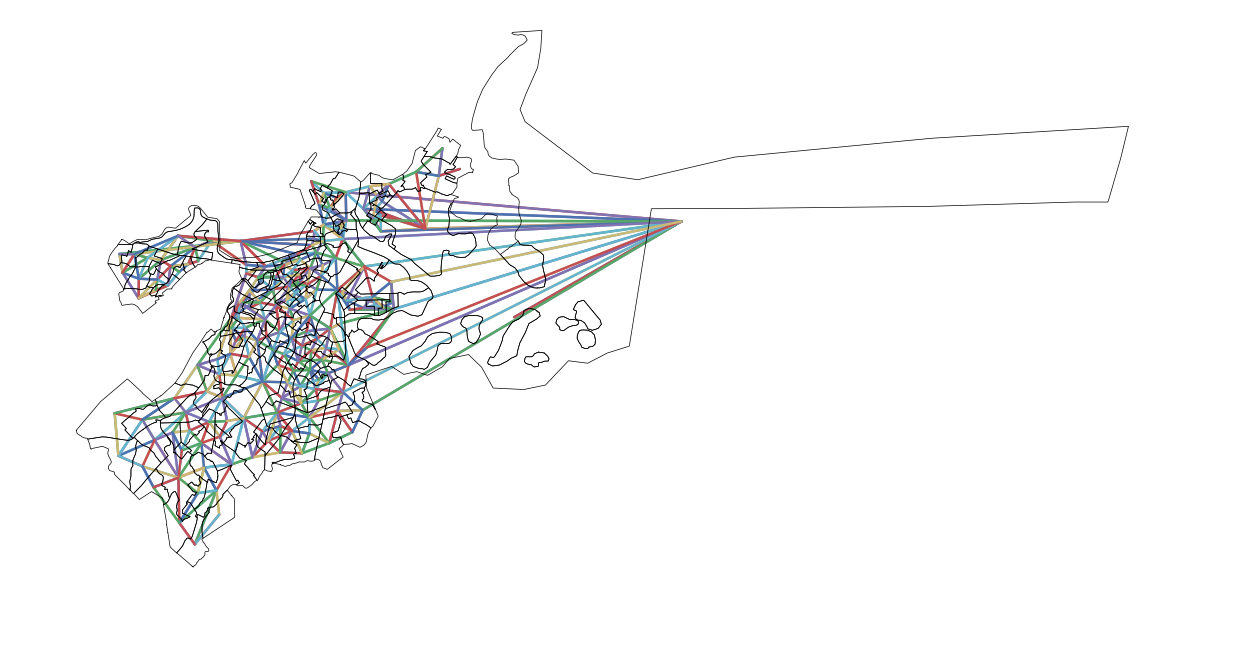

In [63]:

f = plt.figure(figsize=(15, 8))
ax = f.gca()

for i, (k, neighbors) in enumerate(qW.neighbors.items()):
    origin = boston.geometry.iloc[i].centroid
    for nabe_i in neighbors:
        nabe_centroid = boston.geometry.iloc[nabe_i].centroid
        plt.plot([origin.x, nabe_centroid.x], [origin.y, nabe_centroid.y], '-')

boston.plot(ax=ax, linewidth=0.5, facecolor='white')

ax.set_axis_off()

In [69]:
bnb_spatial_lags = ps.lag_spatial(qW, boston['BNBDensity'])
spatial_lag_classes = ps.Quantiles(bnb_spatial_lags, k=5)

In [70]:
spatial_lag_classes

                 Quantiles                  
 
 Lower              Upper              Count
           x[i] <=   24.421               37
  24.421 < x[i] <=   59.602               36
  59.602 < x[i] <=  136.943               36
 136.943 < x[i] <=  281.667               36
 281.667 < x[i] <= 1132.690               36

In [71]:
spatial_lag_classes.yb


array([4, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 3,
       3, 2, 4, 4, 4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 3, 4, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 3,
       3, 2, 1, 0, 4, 3, 1, 3, 2, 2, 3, 4, 4, 3, 1, 3, 4, 0, 0, 0, 2, 0, 0,
       1, 1, 4, 4, 4, 4, 4, 3, 4, 4, 2, 3, 2, 3, 2, 0, 1, 0, 3, 2, 2, 3, 1,
       3, 2, 2, 3, 2, 2, 2, 4, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 1, 2,
       3, 2, 3, 1, 4, 2, 2, 2, 2, 1, 1, 3, 4, 4, 4, 4, 4, 3, 4, 2])

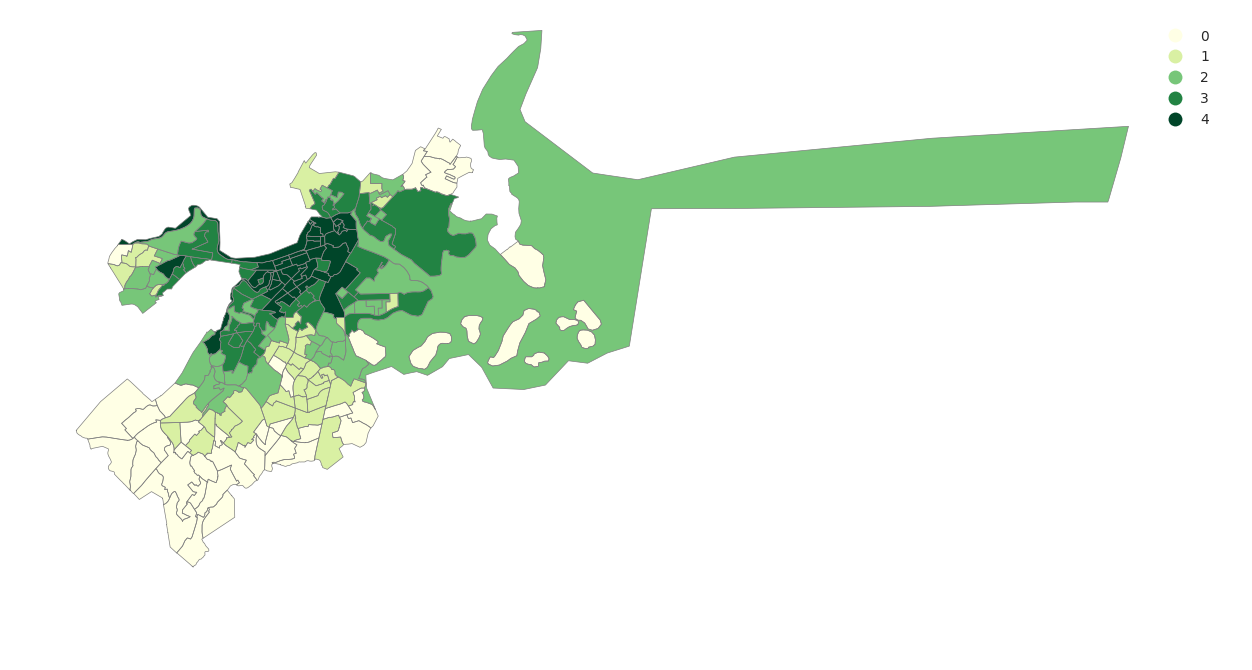

In [72]:
f = plt.figure(figsize=(15, 8))
ax = f.gca()

kw = dict(column='spatial_class', k=5, cmap='YlGn', alpha=1, legend=True, edgecolor='gray', linewidth=0.5, 
          categorical=True)
boston.assign(spatial_class=spatial_lag_classes.yb).plot(ax=ax, **kw)
ax.set_axis_off()

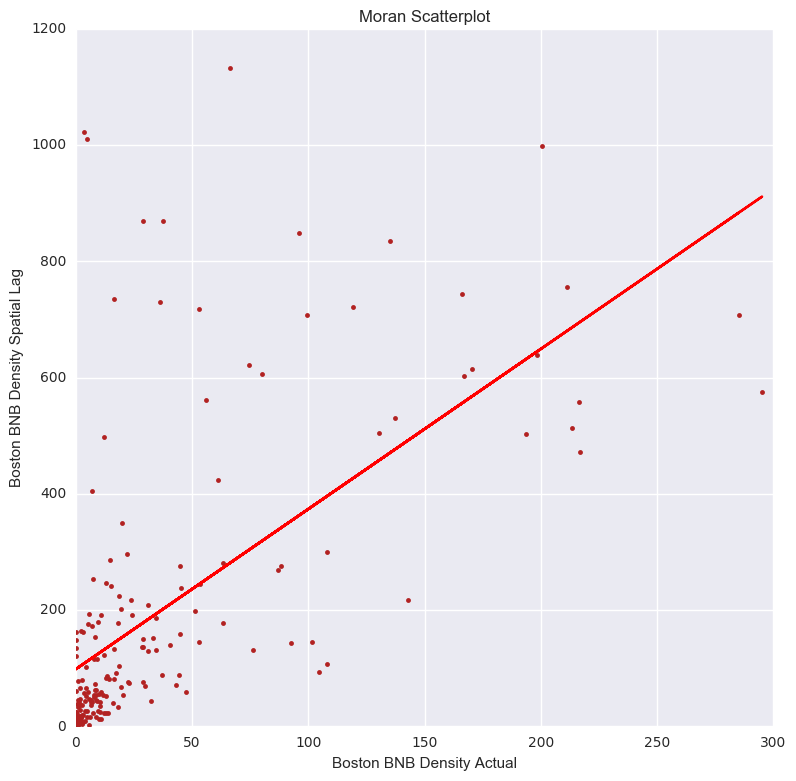

In [73]:

f, ax = plt.subplots(1, figsize=(9, 9))
plt.plot(boston['BNBDensity'], bnb_spatial_lags, '.', color='firebrick')

# Calculate and plot a line of best fit.
b,a = np.polyfit(boston['BNBDensity'], bnb_spatial_lags, 1)
plt.plot(boston['BNBDensity'], a + b*boston['BNBDensity'], 'r')

plt.title('Moran Scatterplot')
plt.ylabel('Boston BNB Density Spatial Lag')
plt.xlabel('Boston BNB Density Actual')
plt.show()

In [74]:
## Clustering

In [75]:
listings['property_type'].value_counts()

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Camper/RV             1
Guesthouse            1
Name: property_type, dtype: int64

In [79]:
apartments = listings.query('property_type == "Apartment" or property_type == "Condominium"').groupby('census_tract').count()['id']
houses = listings.query('property_type == "House" or property_type == "Townhouse"').groupby('census_tract').count()['id']

In [81]:
boston['BNBDensity_Houses'] = boston['NAMELSAD10'].map(houses).fillna(0)
boston['BNBDensity_Apartments'] = boston['NAMELSAD10'].map(apartments).fillna(0)

In [82]:
bnb_market = boston[['BNBDensity', 'BNBDensity_Houses', 'BNBDensity_Apartments']]

In [93]:
import sklearn.cluster
import sklearn.preprocessing

clf = sklearn.cluster.KMeans(n_clusters=3)
X = sklearn.preprocessing.scale(bnb_market.values)
classes = clf.fit(X)

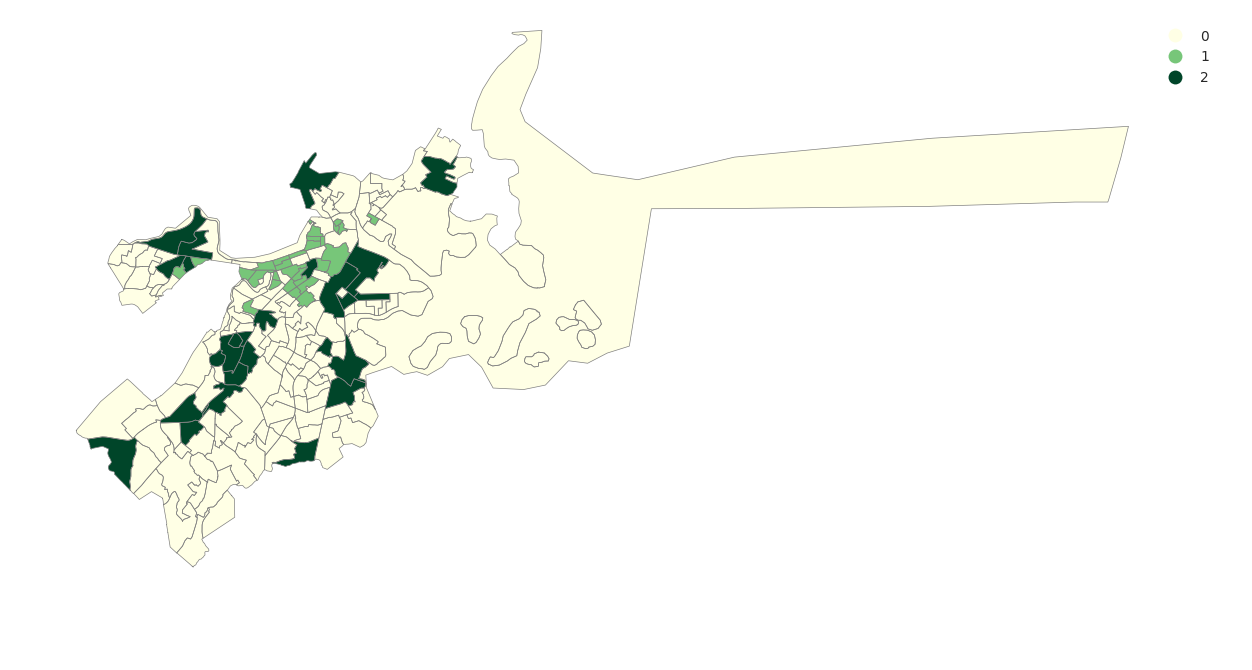

In [94]:
f = plt.figure(figsize=(15, 8))
ax = f.gca()

kw = dict(column='cluster', k=3, cmap='YlGn', alpha=1, legend=True, edgecolor='gray', linewidth=0.5, categorical=True)
boston.assign(cluster=classes.labels_).plot(ax=ax, **kw)
ax.set_axis_off()

In [95]:
bnb_market.assign(cluster=classes.labels_).groupby('cluster').mean()


BNBDensity  BNBDensity_Houses  BNBDensity_Apartments
cluster                                                      
0         12.233624           2.062992               6.740157
1        149.154101           1.571429              47.464286
2         31.235665          11.615385              23.884615

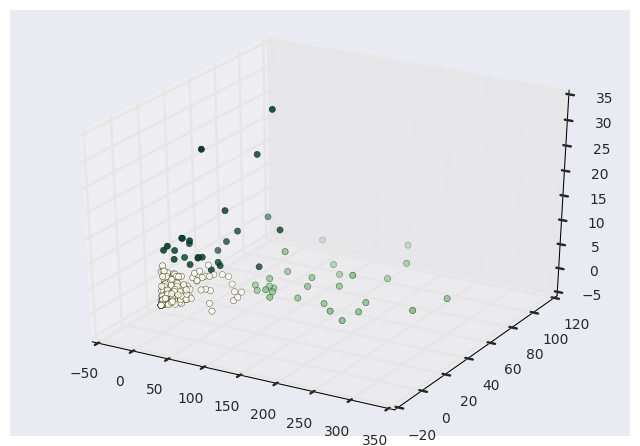

In [96]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bnb_market['BNBDensity'], bnb_market['BNBDensity_Apartments'],
           zs=bnb_market['BNBDensity_Houses'], c=classes.labels_, cmap='YlGn')

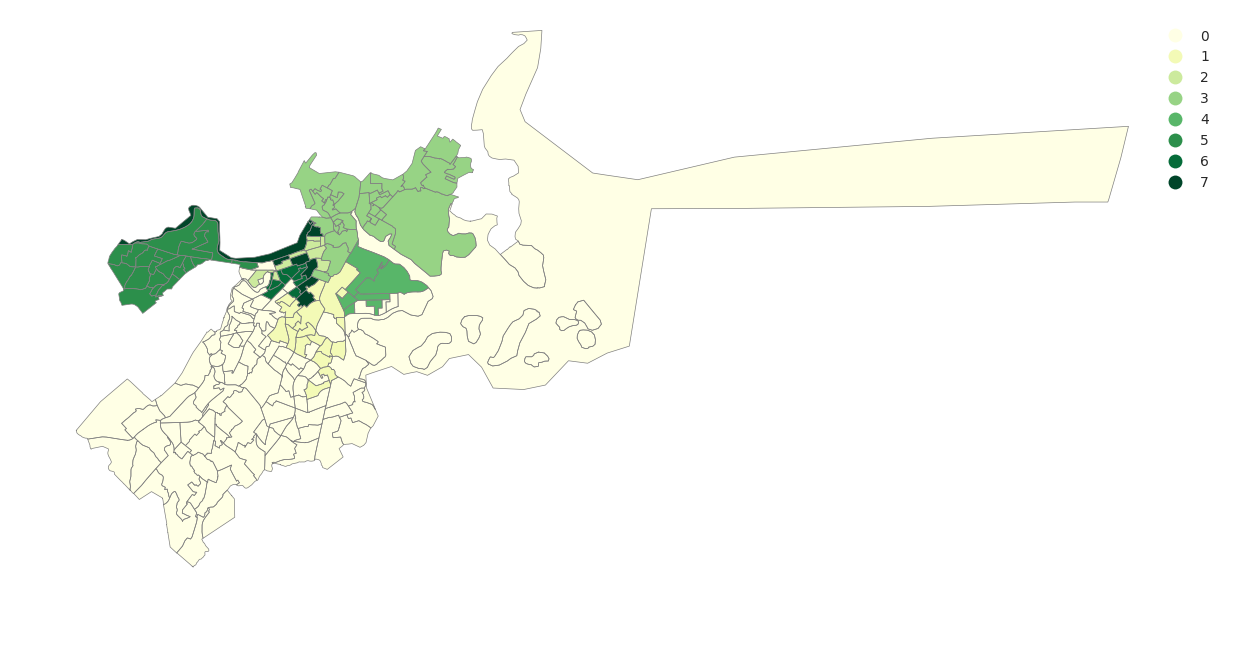

In [106]:

# n = 200
f = plt.figure(figsize=(15, 8))
ax = f.gca()

kw = dict(column='cluster', k=10, cmap='YlGn', alpha=1, legend=True, edgecolor='gray', linewidth=0.5, categorical=True)
boston.assign(cluster=clf.area2region.values()).plot(ax=ax, **kw)
ax.set_axis_off()

In [103]:
clf = ps.region.Maxp(qW, bnb_market.values, 150, boston['BNBs'].values[:,None])


In [104]:
bnb_market.assign(cluster=clf.area2region.values()).groupby('cluster').mean()


BNBDensity  BNBDensity_Houses  BNBDensity_Apartments
cluster                                                      
0         14.952000           3.659091               8.477273
1         12.101414           2.777778               6.500000
2        187.697357           1.000000              55.333333
3         44.976129           1.928571              18.142857
4         26.975896           4.666667              21.333333
5         31.148201           6.500000              17.000000
6        116.643145           1.714286              37.428571
7         74.411154           2.285714              34.428571